In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sanje\AppData\Local\Temp\ipykernel_18976\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('ResumeData.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df['Category'].unique() 

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

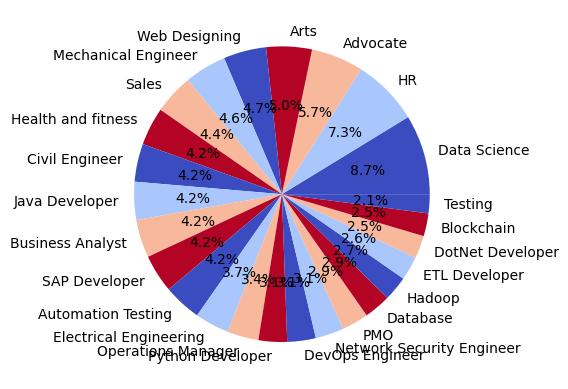

In [5]:
counts = df['Category'].value_counts()
labels = df['Category'].unique() 
plt.figure(figure=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0,1,4)))
plt.show()

In [6]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [7]:
#cleaning resumes 
import re
def cleanResume(txt):
    cleanText = re.sub('http\\S+\\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\\S+\\s', ' ', cleanText)
    cleanText = re.sub('@\\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\\s+', ' ', cleanText)
    return cleanText

In [8]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [9]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [10]:
#words into categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [12]:
print(df['Category'].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


In [13]:
#['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#       'Mechanical Engineer', 'Sales', 'Health and fitness',
#       'Civil Engineer', 'Java Developer', 'Business Analyst',
#       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#       'Operations Manager', 'Python Developer', 'DevOps Engineer',
#       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#      'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing']

In [14]:
#vactorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # The stop_words parameter is used to specify a list of common words 
# it means that the vectorizer will use a predefined list of English stop words, such as "the," "and," "is," etc., which are often considered as noise in the analysis.
tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)
X_train.shape

(769, 7351)

In [16]:
X_test.shape

(193, 7351)

In [17]:
# Model traning 
from sklearn.neighbors import KNeighborsClassifier #supervised learning algorithm that makes classifications of single-class based on data neighbors.
from sklearn.multiclass import OneVsRestClassifier #method for using binary classification algorithms for multi-class classification.
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [18]:
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [19]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [27]:
# myresume = "Sanjeev Kumar Naukapura Viveki Rai Marg Bachelor of Technology in Computer Science and Engineering GLA University Mathura May 2024 Intermediate MJRP Public School, Ghazipur High School Shams National School Ghazipur May 2020 May 2018 INTERNSHIP EXPERIENCE Knowmore Denmark Presentation Designer Freelance presentation designer with average project rating of 8.50 PROJECTS Get My PG Sep 2021 Nov 2021 Feb 2023 Ongoing Hostel and Mess management and booking app for owners and students Java XML Firebase App is Live on play store and used by some hostels near GLA University Play Store link StrangCAM Random video calling and chatting application Java XML webRTC Firebase Jan 2023 Feb 2023 App is under review on play console GLA Complex Online Shopping app for GLA complex with cart feature Java XML Android Studio Aug 2022 Oct 2022 SKILLS Technical Java Data Structures XML SQL Firebase Android Development using Java Adobe Premiere Pro Adobe Illustrator Powerpoint EXTRA CO CURRICULAR ACTIVITIES Professional Time Management Problem-Solving Attended 2 months Industrial Training JoVAC course on Hybrid Application Development with Flutter (Google) Attended workshop on Java Technology organized by AppSquadz Technology Attended workshop on Web World & Java Technology organized by A4Algo Club GLA University Attended webinar on Android Fundamentals organized by Perfect eLearning ACHEVEMENTS Institute rank 13 on GFG Solved 900 questions on GFG and Leetcode 888 rating On CodeForces"
# DS - myresume = "KANDACE LOUDOR DATA SCIENTIST CONTACT kloudor email com Mount Laurel NJ LinkedIn Github EDUCATION B S Statistics Rutgers University September 2011  April 2015 New Brunswick NJ SKILLS Python NumPy Pandas Scikit learn Keras Flask SQL MySQL Postgres Git Time Series Forecasting Productionizing Models Recommendation Engines Customer Segmentation AWS WORK EXPERIENCE Data Scientist Grubhub June 2018 current Princeton NJ Deployed a recommendation engine to production to conditionally recommend  other menu items based on past order history increasing average order size by 7 Implemented various time series forecasting techniques to predict surge in orders lowering customer wait by 10 minutes Designed a model in a pilot to increase incentives for drivers during peak hours increasing driver availability by 22 Led a team of 3 data scientist to model the ordering process 5 unique ways reported results and made recommendations to increase order output by 9 Data Scientist Spectrix Analytical Services March 2016 June 2018 Princeton NJ Built a customer attrition random forest model that improved monthly retention by 12 basis points for clients likely to opt out by providing relevant product features for them Coordinated with the product and marketing teams to determine what kind of client interactions resulted in maximized service opt-ins increasing conversions by 18 Partnered with product team to create a production recommendation engine in Python that improved the length on page for users with 225 in incremental annual revenue Compiled and analyzed data surrounding the prototypes for a prosthesis which saved over 1M in its creation Entry Level Data Analyst Avenica April 2015 March 2016 Mount Laurel NJ Collaborated with product managers to perform cohort analysis that identified an opportunity to reduce pricing by 21 for a segment of users to boost yearly revenue by 560 000 Constructed operational reporting in Tableau to improve scheduling contractors saving 90 000 in the annual budget Implemented a long term pricing experiment that improved customer lifetime value by 23 Ran submitted and reported on monthly client enrollments services opted in for and the employees assigned to clients"
# HR - myresume = "JOAN HENSLEY HUMAN RESOURCES CONTACT joanhensley email com 123 456 7890 Brooklyn NY 11222 LinkedIn EDUCATION Bachelor of Arts Human Resource Management University of Pittsburgh 2010 2014 Pittsburgh PA SKILLS PHR certification ATS Workday Jobvite Compensation & Benefits Payroll Performance Management CAREER SUMMARY PHR certified human resources professional with 7 years of experience who is well versed in designing and administering recruiting on boarding and compensation plans I am looking to continue developing as a well rounded HR manager at an established company like Purcell International Group WORK EXPERIENCE Human Resources Manager StoreBound March 2018 current New York NY Led new talent acquisition and recruitment processes for over 50 new full time hires Administered company wide compensation and benefit plans Conducted employee onboarding and helped organize over 1K hours of training and development initiatives Worked with team members 1 to 1 and in small groups to enhance performance and employee satisfaction Human Resources Manager Uline January 2016 February 2018 New York NY Collaborated with leadership on recruitment strategies development plans performance management and employee engagement to improve retention rates by 12 Provided guidance on employee relations and matters of corrective action that reduced turnover rates by 8 Managed company organizational structure responsibilities and staffing levels creating strong hierarchy channels Human Resources Coordinator Uline September 2014 December 2015 New York NY Scheduled interviews for candidates across 30 roles Managed and administered 100 of pre employment assessments to prospective candidates Assisted with new employee onboarding and ensured all pre employment forms were completed within 72 hours Collected feedback after final round interviews and put together comprehensive compensation packages for prospective hires"
# HR - 
myresume = "John 4553 Lakeview Run New York NY 10005 Summary Personable and dedicated Human Resources Generalist with 8 years of experience in benefits management and administration as well as staff recruitment and development At Meadow Labs Inc increased employee satisfaction rate by 35 and reduced recruitment and benefit costs by 15 Able to decrease the gap between labor force and upper management to produce a cohesive and productive work environment Possess a BA in Human Resources Management and a Professional in Human Resources certification Professional Experience HR Generalist Meadow Labs Inc New York NY September 2016 Present Manage all HR related tasks for a 200 employee medical firm including payroll processing employee benefits program documentation interviewing training and on boarding new recruits Coordinate with IT department to update and automate several onboarding tasks streamlining new hire processes and increasing new employee satisfaction rate by 35 and reducing recruitment costs by 15 Cut benefits costs by 15 through negotiating for improved contracts with leading healthcare providers ensuring benefits were not allocated to non eligible employees Shadow and help conduct employee interviews across 20 positions develop user friendly applications forms and questionnaires and construct more accurate picture of duties and responsibilities for online job descriptions Develop and implement new targeted hiring policies and outreach recruitment programs diversifying workplace environment by 20 Human Resource Specialist Trenton Youth Hospital Boston MA July 2013 August 2016 Scheduled interviews for candidates across 25 roles Helped onboard avg of 5 new employees each week Conducted seminars updating hospital employees on health benefit options Invited 20 motivational speakers and industry experts to give speeches to employees on building workplace confidence and morale Cooperated with local law enforcement to conduct background checks on prospective candidates Assisted new employees with on boarding training ensuring all application forms were filed correctly and that employees understood company health benefits package Education NYU New York NY Bachelor of Arts in Human Resource Management Science 3 8 GPA Honors Thesis Effect of Perceived Organizational Justice Among Gen X Gen Y Captain of varsity baseball and rugby team June 2013 Skills Certifications Professional in Human Resources PHR Certificate Typing skills WPM 90 Proficient with Human Resource Management Systems Workday Kronos Skilled with Microsoft Office Suite Word Excel PowerPoint Recruitment and selection Training and onboarding Benefits management and administration"
# Advocate - myresume = "Jerry CONTACT Lawyer WORK EXPERIENCE Resume Worded London United Kingdom A law firm with 2300 lawyers representing clients in tough corporate transactions Lawyer Collaborated with senior attorneys to acquire a 10K square foot right of way running through the company s property Detected vague contract provisions in a property agreement allowing RW to void 20 sublease restrictions Prepared contracts valued at 310K for HNIs improved client satisfaction ratings by 4 5 basis points Negotiated fees for legal services provided while maintaining an ongoing relationship with 200 clients Polyhire London United Kingdom Offers legal counsel in antitrust trade banking finance mergers and acquisitions Legal Advisor Achieved favorable settlement options while advocating for 100 HNIs in a 2 52M civil litigation cases Provided legal assistance to 340 clients in the real estate industry during the financing and securitization of various asset types Offered legal advice to 50 SMEs during a major company downsize in Q1 and Q2 2020 Negotiated an out of court settlement with 10 opposing counsels regarding a judgment against major clients leading to an 83 reduction in legal fees Growthsi London United Kingdom Barcelona Spain Specializes in environmental law finance matters litigations and trials Paralegal Intern Collected case documents for personal injury and wrongful death cases involving 450 swim instructors Prepared and filed 570 records relating to discovery motions and trial preparations per court procedures Coordinated trial documentation and collected 1000 exhibits for the counsel during an 18 week long trial Assisted in managing 1400 files at the firm and updated the statute of limitations on the case file of several suspects PREVIOUS EXPERIENCE Title Examiner ABC Company London UK Legislative Aide XYZ Company New York USA Court Reporter Internship ABC New York USA Somerset United Kingdom SKILLS Commercial Litigation Document Drafting Legal Consulting Negotiation Legal Writing Estate Planning Techniques Appeals Due Diligence Mergers Acquisitions M A Tools and Software LexisNexis Fastcase Clio Manage Westlaw Languages English Native Romanian Native Spanish Conversational EDUCATION University of New York Bachelor of Law European law New York City New York 10 2011 06 2014 OTHER Accredited Legal Professional ALP Certified Civil Trial Lawyer"


In [28]:
import pickle

# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: HR
12
